In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import WordNetLemmatizer,PorterStemmer
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.cm as cm
import matplotlib.lines as mlines
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
test_result = pd.read_csv('/content/drive/MyDrive/Self Case studies/CS02 Grammar Error Corrector/test_results_2021112201.csv',index_col=0)
# test_result = test_result.rename({'gleu_1':'gleu'},axis=1)

In [3]:
def plot_scatter(df,feat_1,feat_2,title=None):
    fig,axs = plt.subplots(figsize=(10,10))
    x = sorted(list(df[feat_1]))
    y = sorted(list(df[feat_2]))
    random_color = (random.random(), random.random(), random.random())

    axs.scatter(x,y,marker=".",label=feat_1,color=random_color)
    line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Normal Line')
    transform = axs.transAxes
    line.set_transform(transform)
    axs.add_line(line)
    axs.set_ylabel(feat_2)
    axs.grid()
    axs.set_xlabel(feat_1)
    axs.annotate(f"Correlation Score:{round((np.corrcoef(x,y)[0][1]),4)}", xy=(0.7, 0.5), xycoords='axes fraction',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center', fontsize=16)
    if title:
        plt.title(title)
    plt.show()

def show_percentiles(df,feature_name,quantile_range,quantile_incr):
    '''shows quantiles  of specified feature name from dataframe in specified range'''
    quantiles = np.arange(quantile_range[0],quantile_range[1],quantile_incr)
    quant_array = [np.percentile(df[feature_name] , i) for i in quantiles]
    return pd.DataFrame(quant_array,columns=[feature_name]).set_index(quantiles).transpose()

## Boxchart of score

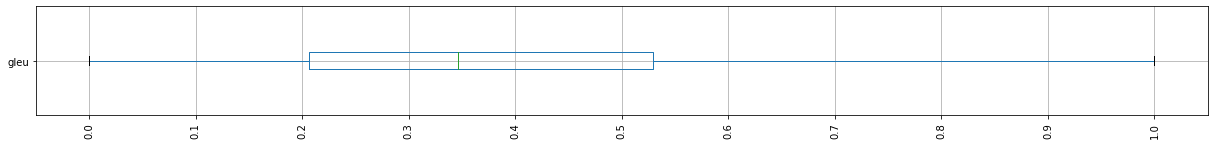

In [4]:
test_result.boxplot(column=['gleu'],figsize=(21, 2),vert=0,grid=True)
plt.xticks(np.arange(0,1.1,0.1),rotation=90)
plt.show()

In [7]:
test_result['gleu'].mean()

0.39205635493088353

In [ ]:
show_percentiles(test_result,'gleu',(0,101),5)

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
gleu,0.0,0.088235,0.12,0.153846,0.181818,0.205882,0.233333,0.264706,0.289474,0.318182,0.346154,0.382353,0.411765,0.452381,0.5,0.529412,0.588235,0.633333,0.710526,1.0,1.0


### Observations


1.   Min & Max gleu score is 0 & 1
2.   Median gleu score is 0.346 whereas IQR ranges from 0.20 to 0.529



## Analyzing low mid high scored sentences 

In [11]:
test_result_low = test_result[test_result['gleu']<=0.3]
test_result_mid = test_result[(test_result['gleu']>0.3)&(test_result['gleu']<=0.6)]
test_result_high = test_result[test_result['gleu']>0.6]

In [12]:
print(f'Sentences with low score {test_result_low.shape[0]}({test_result_low.shape[0]*100/len(test_result):.2f}%)')
print(f'Sentences with mid score {test_result_mid.shape[0]}({test_result_mid.shape[0]*100/len(test_result):.2f}%)')
print(f'Sentences with high score {test_result_high.shape[0]}({test_result_high.shape[0]*100/len(test_result):.2f}%)')

Sentences with low score 11378(42.70%)
Sentences with mid score 10492(39.37%)
Sentences with high score 4779(17.93%)


In [13]:
test_result_low['incorrect_word_count'] = test_result_low['incorrect'].astype('str').apply(lambda x:len(x.split()))
test_result_mid['incorrect_word_count'] = test_result_mid['incorrect'].astype('str').apply(lambda x:len(x.split()))
test_result_high['incorrect_word_count'] = test_result_high['incorrect'].astype('str').apply(lambda x:len(x.split()))

In [9]:
test_result['incorrect_word_count'] = test_result['incorrect'].astype('str').apply(lambda x:len(x.split()))

In [ ]:
print(f"Low Score Word Count Median & Mean{test_result_low['incorrect_word_count'].median(),test_result_low['incorrect_word_count'].mean()}")

Low Score Word Count Median & Mean(9.0, 8.52504833889963)


In [ ]:
print(f"Medium Score Word Count Median & Mean{test_result_mid['incorrect_word_count'].median(),test_result_mid['incorrect_word_count'].mean()}")

Medium Score Word Count Median & Mean(9.0, 8.41717499046893)


In [ ]:
print(f"High Score Word Count Median & Mean{test_result_high['incorrect_word_count'].median(),test_result_high['incorrect_word_count'].mean()}")

High Score Word Count Median & Mean(8.0, 8.01464741577736)


In [18]:
import seaborn as sns

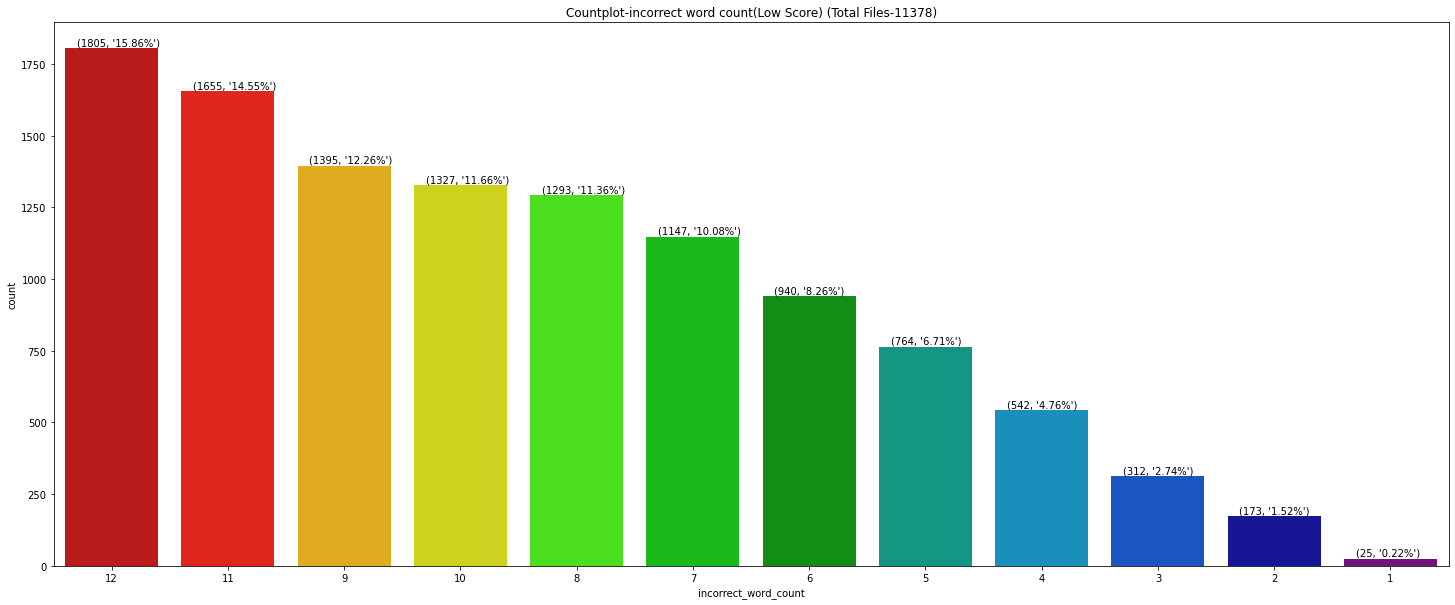

In [48]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x = "incorrect_word_count",data=test_result_low, palette="nipy_spectral_r",order = test_result_low['incorrect_word_count'].value_counts().index)
total = len(test_result_low)
for p in ax.patches:
    count = p.get_height() 
    percentage = f'{((count*100)/total):.2f}%'
    x = p.get_x()-0.1
    y = p.get_y() + p.get_height()+10
    ax.annotate((count,percentage), (x+0.2, y))
plt.title(f"Countplot-incorrect word count(Low Score) (Total Files-{total})")
plt.show()

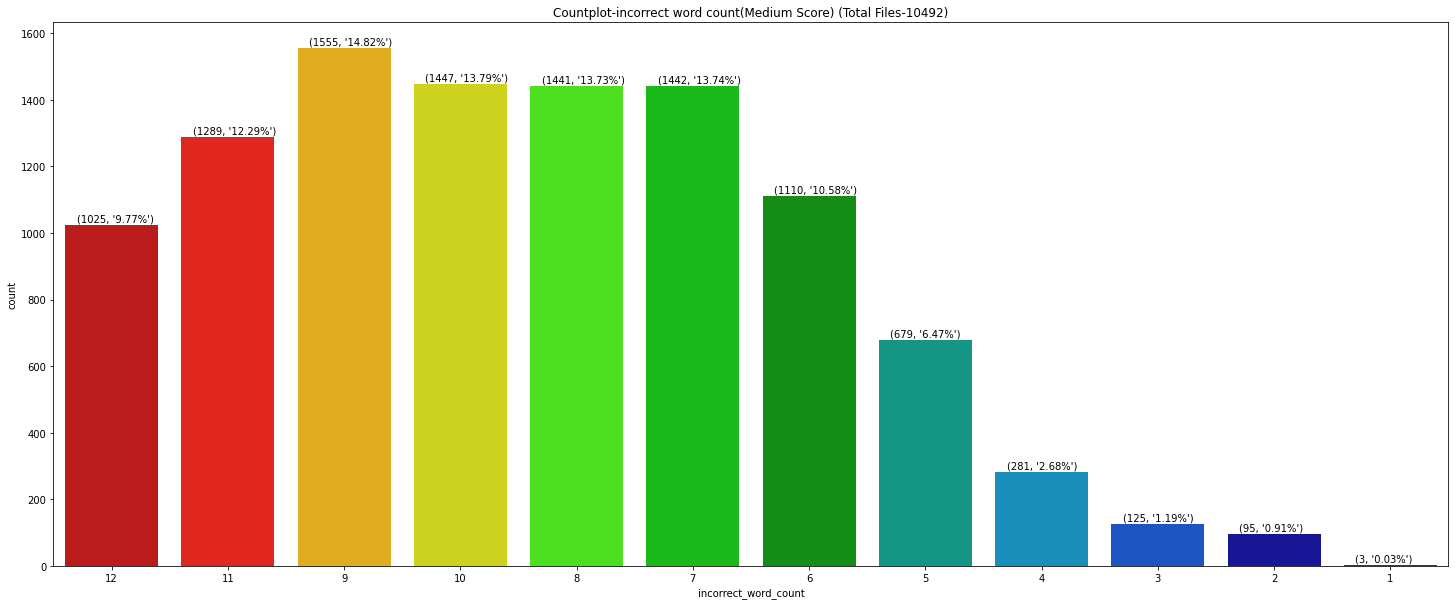

In [49]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x = "incorrect_word_count",data=test_result_mid, palette="nipy_spectral_r",order = test_result_low['incorrect_word_count'].value_counts().index)
total = len(test_result_mid)
for p in ax.patches:
    count = p.get_height() 
    percentage = f'{((count*100)/total):.2f}%'
    x = p.get_x()-0.1
    y = p.get_y() + p.get_height()+10
    ax.annotate((count,percentage), (x+0.2, y))
plt.title(f"Countplot-incorrect word count(Medium Score) (Total Files-{total})")
plt.show()

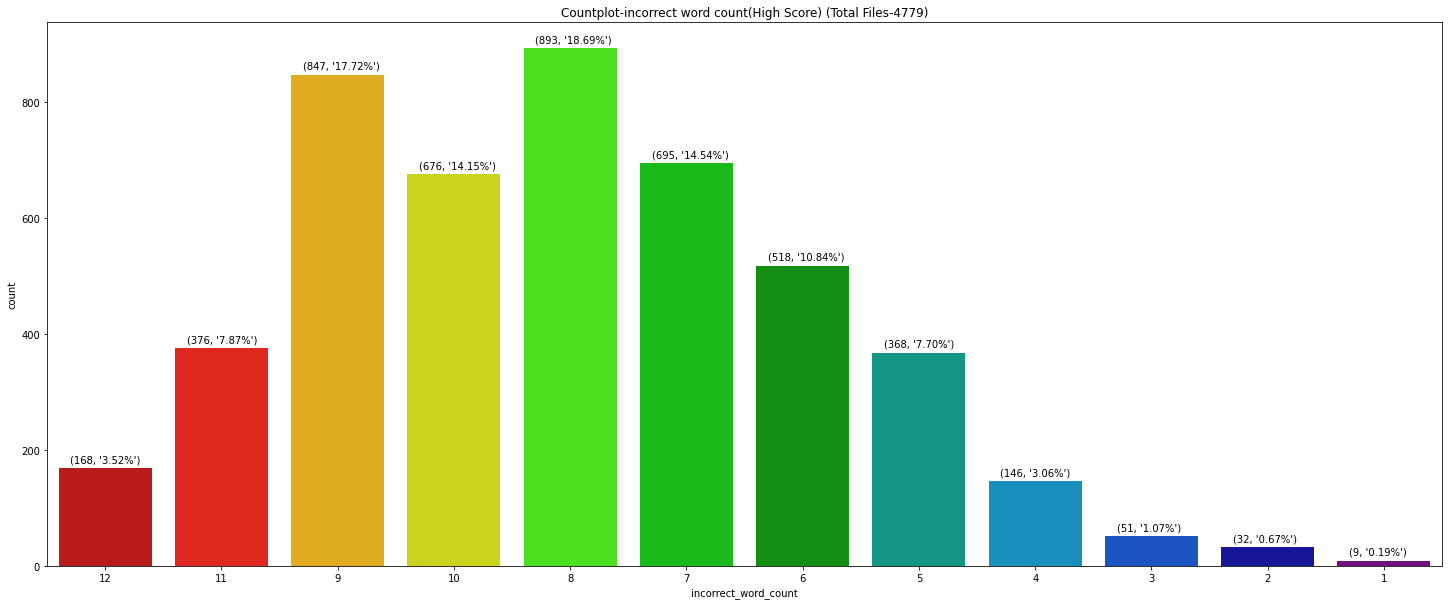

In [50]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x = "incorrect_word_count",data=test_result_high, palette="nipy_spectral_r",order = test_result_low['incorrect_word_count'].value_counts().index)
total = len(test_result_high)
for p in ax.patches:
    count = p.get_height() 
    percentage = f'{((count*100)/total):.2f}%'
    x = p.get_x()-0.1
    y = p.get_y() + p.get_height()+10
    ax.annotate((count,percentage), (x+0.2, y))
plt.title(f"Countplot-incorrect word count(High Score) (Total Files-{total})")
plt.show()

In [16]:
test_result_low['incorrect_word_count'].value_counts()

12    1805
11    1655
9     1395
10    1327
8     1293
7     1147
6      940
5      764
4      542
3      312
2      173
1       25
Name: incorrect_word_count, dtype: int64

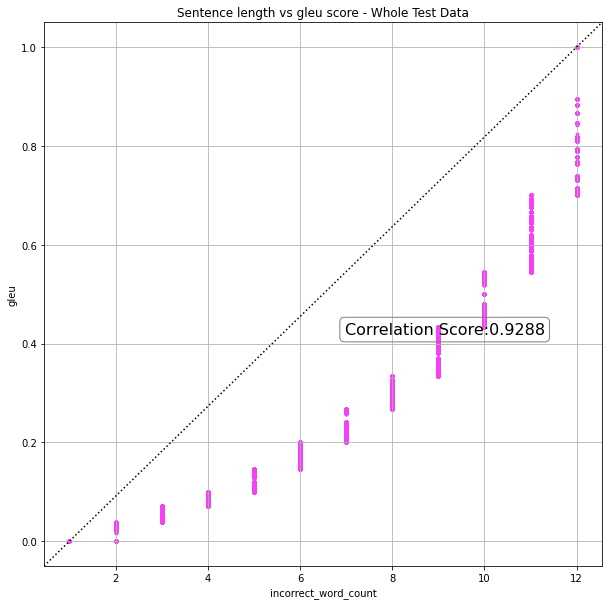

In [10]:
plot_scatter(test_result,'incorrect_word_count','gleu','Sentence length vs gleu score - Whole Test Data')



1.   When input sentence length is less, the results are good but start deteriorating as length starts increasing



## Word Cloud

In [ ]:
stop=set(stopwords.words('english'))

In [ ]:
def generate_wordcloud(text):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in tqdm(text):
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

In [ ]:
def plot_wordcloud(corpus):
    wordcloud = WordCloud(background_color='white',stopwords=set(STOPWORDS),
                          max_words=100,max_font_size=30,scale=3,random_state=1)
    wordcloud=wordcloud.generate(str(corpus))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show() 

In [ ]:
low_sen_wordcloud = generate_wordcloud(test_result_low['incorrect'].astype(str))

100%|██████████| 11378/11378 [00:01<00:00, 6900.19it/s]


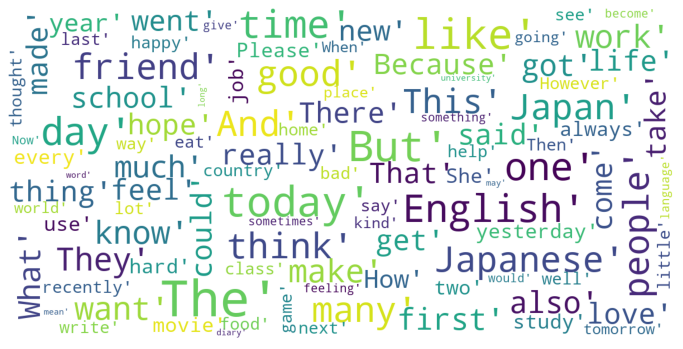

In [ ]:
plot_wordcloud(low_sen_wordcloud)

In [ ]:
mid_sen_wordcloud = generate_wordcloud(test_result_mid['incorrect'].astype(str))

100%|██████████| 10492/10492 [00:01<00:00, 7048.71it/s]


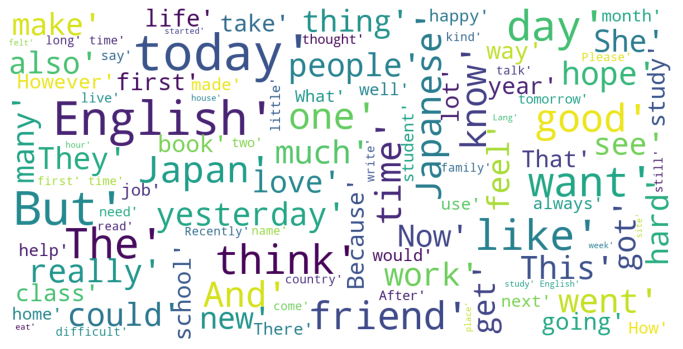

In [ ]:
plot_wordcloud(mid_sen_wordcloud)

In [ ]:
high_sen_wordcloud = generate_wordcloud(test_result_high['incorrect'].astype(str))

100%|██████████| 4779/4779 [00:00<00:00, 7335.70it/s]


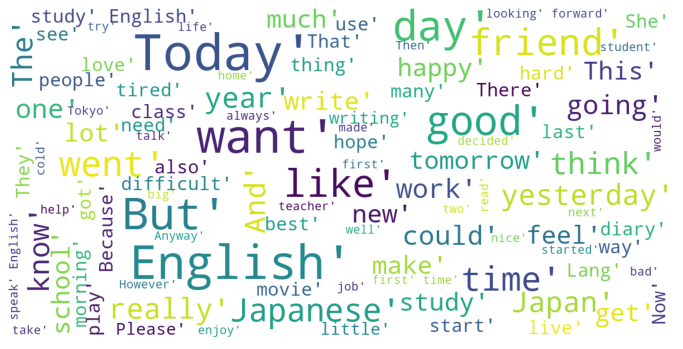

In [ ]:
plot_wordcloud(high_sen_wordcloud)